In [1]:
import pandas as pd
import numpy as np
import sys
import os
from pathlib import Path
import urllib.request
from tqdm import tqdm
from PIL import Image
import pytesseract
from scipy.spatial.distance import euclidean


from Levenshtein import distance as levenshtein_dist
import cv2  #pip install opencv-python
import matplotlib.pyplot as plt

# Configure pandas and numpy settings for better output display
pd.set_option('display.max_colwidth', None)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
df = pd.read_csv("MovieGenre.csv",encoding='ISO-8859-1')
df.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,"https://images-na.ssl-images-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_UX182_CR0,0,182,268_AL_.jpg"
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,"https://images-na.ssl-images-amazon.com/images/M/MV5BZTk2ZmUwYmEtNTcwZS00YmMyLWFkYjMtNTRmZDA3YWExMjc2XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UY268_CR10,0,182,268_AL_.jpg"
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMjQxM2YyNjMtZjUxYy00OGYyLTg0MmQtNGE2YzNjYmUyZTY1XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMTczMTMyMTgyM15BMl5BanBnXkFtZTcwOTc4OTQyMQ@@._V1_UY268_CR4,0,182,268_AL_.jpg"
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BOTEyNzg5NjYtNDU4OS00MWYxLWJhMTItYWU4NTkyNDBmM2Y0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"


In [3]:
print(f"Total image count: {df.size}")

Total image count: 240648


In [4]:
# Drop rows with missing values
df = df.dropna(axis=0, how='any')

# Retain only the 1% rows for processing
count = int((df.size)*0.01)
df = df.iloc[-count:]

# Display the shape of the resulting DataFrame
df.shape


(2354, 6)

In [5]:
# Method to download images from URLs

missing_posters = []
poster_ids = []

if os.path.isdir("Posters/") and os.listdir("Posters/"):
    for idx, record in tqdm(df.iterrows()):
        image_url = record['Poster']
        movie_id = record['imdbId']
    
        save_path = "Posters/" + str(movie_id) + ".jpg"
        
        if os.path.exists(save_path):
            poster_ids.append(str(movie_id))
        else:
            missing_posters.append(movie_id)
else:
    folder_path = Path("Posters/")
    folder_path.mkdir(parents=True, exist_ok=True)

    for idx, record in tqdm(df.iterrows()):
    
        image_url = record['Poster']
        movie_id = record['imdbId']
    
        save_path = "Posters/" + str(movie_id) + ".jpg"
                
        try:
            response = urllib.request.urlopen(image_url)
            image_data = response.read()
            with open(save_path, 'wb') as image_file:
                image_file.write(bytearray(image_data))
            poster_ids.append(str(movie_id))
        except Exception as e:
            print(e)
            missing_posters.append(movie_id)

print("Total number of posters not downloaded: ", len(missing_posters))
print("List of missing IMDB IDs: ", missing_posters)


22it [00:03,  7.18it/s]

HTTP Error 404: Not Found


41it [00:06,  6.83it/s]

HTTP Error 404: Not Found


63it [00:10,  6.25it/s]

HTTP Error 404: Not Found


64it [00:10,  6.43it/s]

HTTP Error 404: Not Found


74it [00:11,  7.31it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


75it [00:11,  6.75it/s]

HTTP Error 404: Not Found


77it [00:12,  5.91it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


78it [00:12,  6.24it/s]

HTTP Error 404: Not Found


80it [00:12,  5.87it/s]

HTTP Error 404: Not Found


82it [00:13,  5.96it/s]

HTTP Error 404: Not Found


84it [00:13,  5.39it/s]

HTTP Error 404: Not Found


86it [00:14,  5.67it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


89it [00:14,  5.54it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


91it [00:15,  5.45it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


93it [00:15,  5.72it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


95it [00:15,  6.47it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


97it [00:15,  7.27it/s]

HTTP Error 404: Not Found


107it [00:18,  6.09it/s]

HTTP Error 404: Not Found


119it [00:19,  7.27it/s]

HTTP Error 404: Not Found


135it [00:25,  1.59it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


170it [00:29,  6.62it/s]

HTTP Error 404: Not Found


194it [00:32,  8.25it/s]

HTTP Error 404: Not Found


196it [00:33,  6.89it/s]

HTTP Error 404: Not Found


203it [00:35,  4.04it/s]

HTTP Error 404: Not Found


235it [00:39,  7.27it/s]

HTTP Error 404: Not Found


248it [00:41,  6.62it/s]

HTTP Error 404: Not Found


267it [00:43,  8.15it/s]

HTTP Error 404: Not Found


270it [00:44,  7.13it/s]

HTTP Error 404: Not Found


302it [00:49,  3.38it/s]

HTTP Error 404: Not Found


311it [00:50,  5.84it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


313it [00:51,  5.61it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


315it [00:51,  5.51it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


316it [00:51,  5.97it/s]

HTTP Error 404: Not Found


318it [00:51,  5.62it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


322it [00:52,  6.95it/s]

HTTP Error 404: Not Found


343it [00:55,  7.76it/s]

HTTP Error 404: Not Found


348it [00:56,  5.07it/s]

HTTP Error 404: Not Found


357it [00:58,  7.55it/s]

HTTP Error 404: Not Found


367it [00:59,  5.14it/s]

HTTP Error 404: Not Found


370it [01:00,  5.23it/s]

HTTP Error 404: Not Found


371it [01:00,  4.71it/s]

HTTP Error 404: Not Found


376it [01:01,  4.88it/s]

HTTP Error 404: Not Found


378it [01:02,  3.95it/s]

HTTP Error 404: Not Found


395it [01:07,  3.28it/s]

HTTP Error 404: Not Found


400it [01:08,  3.63it/s]

HTTP Error 404: Not Found


402it [01:09,  2.35it/s]

HTTP Error 404: Not Found


438it [01:17,  6.10it/s]

HTTP Error 404: Not Found


440it [01:17,  5.49it/s]

HTTP Error 404: Not Found


451it [01:19,  5.39it/s]

HTTP Error 404: Not Found


458it [01:21,  4.44it/s]

HTTP Error 404: Not Found


489it [01:27,  5.19it/s]

HTTP Error 404: Not Found


510it [01:32,  5.11it/s]

HTTP Error 404: Not Found


511it [01:32,  5.04it/s]

HTTP Error 404: Not Found


513it [01:33,  2.51it/s]

HTTP Error 404: Not Found


518it [01:34,  4.59it/s]

HTTP Error 404: Not Found


556it [01:41,  6.05it/s]

HTTP Error 404: Not Found


572it [01:44,  6.44it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


577it [01:44,  6.51it/s]

HTTP Error 404: Not Found


598it [01:48,  5.49it/s]

HTTP Error 404: Not Found


646it [01:57,  6.14it/s]

HTTP Error 404: Not Found


652it [01:58,  6.78it/s]

HTTP Error 404: Not Found


682it [02:02,  6.96it/s]

HTTP Error 404: Not Found


706it [02:06,  5.02it/s]

HTTP Error 404: Not Found


731it [02:10,  6.27it/s]

HTTP Error 404: Not Found


740it [02:12,  6.51it/s]

HTTP Error 404: Not Found


749it [02:13,  6.34it/s]

HTTP Error 404: Not Found


772it [02:17,  6.85it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


787it [02:19,  5.44it/s]

HTTP Error 404: Not Found


810it [02:23,  5.51it/s]

HTTP Error 404: Not Found


813it [02:23,  6.16it/s]

HTTP Error 404: Not Found


822it [02:25,  6.45it/s]

HTTP Error 404: Not Found


827it [02:25,  6.16it/s]

HTTP Error 404: Not Found


837it [02:27,  7.91it/s]

HTTP Error 404: Not Found


839it [02:27,  7.73it/s]

HTTP Error 404: Not Found


853it [02:29,  6.80it/s]

HTTP Error 404: Not Found


876it [02:32,  7.60it/s]

HTTP Error 404: Not Found


888it [02:34,  7.13it/s]

HTTP Error 404: Not Found


916it [02:37,  6.76it/s]

HTTP Error 404: Not Found


919it [02:38,  7.40it/s]

HTTP Error 404: Not Found


943it [02:41,  6.59it/s]

HTTP Error 404: Not Found


950it [02:42,  6.98it/s]

HTTP Error 404: Not Found


958it [02:43,  6.58it/s]

HTTP Error 404: Not Found


968it [02:45,  5.97it/s]

HTTP Error 404: Not Found


972it [02:46,  6.23it/s]

HTTP Error 404: Not Found


991it [02:48,  7.98it/s]

HTTP Error 404: Not Found


1010it [02:52,  5.56it/s]

HTTP Error 404: Not Found


1035it [02:55,  5.17it/s]

HTTP Error 404: Not Found


1040it [02:56,  7.13it/s]

HTTP Error 404: Not Found


1049it [02:57,  6.91it/s]

HTTP Error 404: Not Found


1072it [03:01,  7.01it/s]

HTTP Error 404: Not Found


1076it [03:01,  8.01it/s]

HTTP Error 404: Not Found


1093it [03:06,  3.26it/s]

HTTP Error 404: Not Found


1095it [03:06,  4.01it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


1099it [03:07,  5.28it/s]

HTTP Error 404: Not Found


1103it [03:07,  5.90it/s]

HTTP Error 404: Not Found


1111it [03:08,  6.21it/s]

HTTP Error 404: Not Found


1133it [03:12,  7.98it/s]

HTTP Error 404: Not Found


1138it [03:12,  8.09it/s]

HTTP Error 404: Not Found


1148it [03:14,  5.71it/s]

HTTP Error 404: Not Found


1156it [03:16,  5.38it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


1158it [03:16,  5.04it/s]

HTTP Error 404: Not Found


1162it [03:17,  6.36it/s]

HTTP Error 404: Not Found


1192it [03:23,  4.75it/s]

HTTP Error 404: Not Found


1198it [03:24,  3.92it/s]

HTTP Error 404: Not Found


1226it [03:31,  3.44it/s]

HTTP Error 404: Not Found


1248it [03:37,  4.82it/s]

HTTP Error 404: Not Found


1255it [03:38,  5.21it/s]

HTTP Error 404: Not Found


1264it [03:40,  4.70it/s]

HTTP Error 403: Forbidden


1268it [03:41,  4.97it/s]

HTTP Error 404: Not Found


1282it [03:43,  5.48it/s]

HTTP Error 404: Not Found


1303it [03:48,  4.63it/s]

HTTP Error 404: Not Found


1336it [03:55,  6.03it/s]

HTTP Error 404: Not Found


1355it [03:58,  4.13it/s]

HTTP Error 404: Not Found


1404it [04:07,  5.09it/s]

HTTP Error 404: Not Found


1499it [04:25,  7.70it/s]

HTTP Error 404: Not Found


1506it [04:26,  6.77it/s]

HTTP Error 404: Not Found


1551it [04:32,  7.71it/s]

HTTP Error 404: Not Found


1577it [04:37,  5.55it/s]

HTTP Error 404: Not Found


1585it [04:39,  5.32it/s]

HTTP Error 404: Not Found


1625it [04:45,  7.03it/s]

HTTP Error 404: Not Found


1629it [04:46,  6.01it/s]

HTTP Error 404: Not Found


1635it [04:47,  7.34it/s]

HTTP Error 404: Not Found


1649it [04:48,  7.81it/s]

HTTP Error 404: Not Found


1661it [04:51,  5.74it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


1664it [04:51,  6.79it/s]

HTTP Error 404: Not Found


1668it [04:52,  6.12it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


1670it [04:52,  6.83it/s]

HTTP Error 404: Not Found


1671it [04:52,  5.77it/s]

HTTP Error 404: Not Found


1673it [04:52,  5.94it/s]

HTTP Error 404: Not Found


1682it [04:54,  7.63it/s]

HTTP Error 404: Not Found


1686it [04:54,  7.75it/s]

HTTP Error 404: Not Found


1720it [04:59,  6.27it/s]

HTTP Error 404: Not Found


1725it [05:00,  5.77it/s]

HTTP Error 404: Not Found


1726it [05:00,  5.73it/s]

HTTP Error 404: Not Found


1750it [05:07,  6.53it/s]

HTTP Error 404: Not Found


1776it [05:11,  5.82it/s]

HTTP Error 404: Not Found


1798it [05:16,  6.91it/s]

HTTP Error 404: Not Found


1800it [05:16,  6.16it/s]

HTTP Error 404: Not Found


1806it [05:17,  6.62it/s]

HTTP Error 404: Not Found


1808it [05:17,  7.26it/s]

HTTP Error 404: Not Found


1831it [05:21,  5.95it/s]

HTTP Error 404: Not Found


1833it [05:21,  6.14it/s]

HTTP Error 404: Not Found


1841it [05:22,  6.62it/s]

HTTP Error 404: Not Found


1849it [05:24,  6.75it/s]

HTTP Error 404: Not Found


1854it [05:24,  6.85it/s]

HTTP Error 404: Not Found


1866it [05:26,  6.43it/s]

HTTP Error 404: Not Found


1878it [05:28,  6.58it/s]

HTTP Error 404: Not Found


1905it [05:33,  6.24it/s]

HTTP Error 404: Not Found


1935it [05:38,  7.37it/s]

HTTP Error 404: Not Found


1939it [05:38,  7.15it/s]

HTTP Error 404: Not Found


1955it [05:41,  6.69it/s]

HTTP Error 404: Not Found


1959it [05:41,  6.31it/s]

HTTP Error 404: Not Found


2019it [05:53,  6.61it/s]

HTTP Error 404: Not Found


2078it [06:02,  6.49it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


2104it [06:05,  8.51it/s]

HTTP Error 404: Not Found


2173it [06:15,  6.12it/s]

HTTP Error 404: Not Found


2180it [06:15,  9.18it/s]

HTTP Error 404: Not Found


2189it [06:16, 10.77it/s]

HTTP Error 404: Not Found


2191it [06:17,  8.66it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found


2213it [06:19, 10.35it/s]

HTTP Error 404: Not Found


2231it [06:20,  8.99it/s]

HTTP Error 404: Not Found


2267it [06:23, 10.71it/s]

HTTP Error 404: Not Found


2269it [06:24,  9.60it/s]

HTTP Error 404: Not Found


2289it [06:25, 10.94it/s]

HTTP Error 404: Not Found


2295it [06:26,  9.98it/s]

HTTP Error 404: Not Found


2299it [06:26, 10.65it/s]

HTTP Error 404: Not Found


2303it [06:27, 10.35it/s]

HTTP Error 404: Not Found


2307it [06:27, 11.26it/s]

HTTP Error 404: Not Found


2347it [06:30, 11.94it/s]

HTTP Error 404: Not Found


2349it [06:30, 11.04it/s]

HTTP Error 404: Not Found


2353it [06:30, 10.67it/s]

HTTP Error 404: Not Found


2354it [06:32,  6.00it/s]

Total number of posters not downloaded:  191
List of missing IMDB IDs:  [5200962, 3715854, 52844, 61067, 920457, 2555958, 4258292, 1705772, 5178278, 4987556, 4806232, 5128328, 4937812, 3320578, 1857670, 99043, 368400, 417241, 807944, 1039952, 984177, 1388441, 377321, 984202, 284971, 152979, 161981, 205451, 4188654, 57380, 70588, 463028, 79655, 1530535, 27684, 103008, 74187, 1891755, 449951, 1655607, 376144, 375878, 1725795, 464071, 376127, 376076, 335185, 80485, 72012, 77278, 1252596, 65788, 52227, 66920, 58533, 67303, 388154, 2838678, 47238, 1325734, 3509114, 2301155, 4016934, 2391833, 1857772, 2577666, 1235534, 1849868, 84408, 135534, 46333, 2072214, 154684, 80648, 63531, 79882, 235686, 1667418, 56110, 104874, 98972, 33853, 795176, 68662, 382205, 92855, 40861, 38396, 39490, 76440, 46714, 78978, 50545, 51507, 80321, 28726, 86476, 1910605, 2263814, 65407, 117017, 124014, 1667100, 433367, 5613056, 38611, 40481, 31517, 39861, 175471, 53214, 5275830, 5503594, 41771, 4645368, 5065810, 9959

In [6]:
def quantize_hsv(image, levels=5):
    """
    Applies uneven quantization to an image in the HSV color space,
    allocating more intervals for the hue (H) component while reducing
    gaps for saturation (S) and value (V).
    
    Parameters:
        image (numpy.ndarray): Input BGR image.
        levels (int): Number of levels for V and S.
    
    Returns:
        numpy.ndarray: Quantized HSV image.
    """
    # Convert the image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define discrete levels for hue quantization
    hue_levels = np.array([16, 26, 40, 70, 85, 145, 160, 220, 262, 278, 335])
    
    # Quantize the Hue (H) component
    H = hsv[:, :, 0]
    H_quantized = np.digitize(H, hue_levels, right=True) * (180 // len(hue_levels))  # Normalize to OpenCV's 180 range (0 to 360 usually)

    # Apply uniform quantization to S and V components (reduce precision)

    # Swain & Ballard (1991) in Histogram-based color indexing proposed H: 16, S: 4, V: 4.
    # Pass & Zabih (1996) in Histogram refinement for content-based image retrieval used H: 8, S: 3, V: 3.
    # MPEG-7 (Multimedia Standard) uses H: 32, S: 4, V: 8 in some implementations.
    # Let's avreage it to 5 as is unspecified in the paper

    step_size = 256 / levels # Values range from 0 to 255, we need to calculate each level
    S = (hsv[:, :, 1] // step_size) * step_size  # Reduce to n levels 
    V = (hsv[:, :, 2] // step_size) * step_size  # Reduce to n levels

    # Merge back into an HSV image
    quantized_hsv = cv2.merge([H_quantized.astype(np.uint8), S.astype(np.uint8), V.astype(np.uint8)])

    return quantized_hsv


In [7]:
def classify_color_hsv(hsv):
    """
    Classifies colors in a quantized HSV image:
    - Black: V < 0.2
    - Gray: S < 0.2
    - White: V >= 0.85 and H <= 0.1
    - Colored: Split into four subregions with S = 0.65 and V = 0.7
    
    Parameters:
        hsv (numpy.ndarray): Quantized HSV image.
    
    Returns:
        numpy.ndarray: Classified color map (each pixel labeled by category).
    """
    # Normalize HSV values to [0,1] range for thresholding
    hsv = hsv.astype(np.float32) / 255.0
    H, S, V = hsv[:, :, 0], hsv[:, :, 1], hsv[:, :, 2]

    # Create an empty classification map
    classified = np.zeros_like(H, dtype=np.uint8)

    # Define category labels
    BLACK = 1
    GRAY = 2
    WHITE = 3
    COLOR_REGION_1 = 4
    COLOR_REGION_2 = 5
    COLOR_REGION_3 = 6
    COLOR_REGION_4 = 7

    # Apply classification rules
    classified[V < 0.2] = BLACK  # Black
    classified[(S < 0.2) & (classified == 0)] = GRAY  # Gray
    classified[(V >= 0.85) & (H <= 0.1) & (classified == 0)] = WHITE  # White

    # Remaining color space is divided into 4 subregions
    color_mask = (classified == 0)  # Pixels not classified yet

    # Sorting histogram in decreasing order on the basis of pixel number;
    classified[(color_mask) & (S <= 0.65) & (V <= 0.7)] = COLOR_REGION_1
    classified[(color_mask) & (S > 0.65) & (V <= 0.7)] = COLOR_REGION_2
    classified[(color_mask) & (S <= 0.65) & (V > 0.7)] = COLOR_REGION_3
    classified[(color_mask) & (S > 0.65) & (V > 0.7)] = COLOR_REGION_4

    return classified

In [8]:

def compute_mass_centers(classified_map):
    """
    Computes the mass center (centroid) for the dominant colors in the classified map.

    Parameters:
        classified_map (numpy.ndarray): Image where each pixel is classified into a category.

    Returns:
        list: A list of tuples containing (color_label, mass_center_x, mass_center_y, pixel_count).
    """
    unique_colors, counts = np.unique(classified_map, return_counts=True)

    # Sort colors by their pixel count in descending order
    sorted_indices = np.argsort(-counts)  # Negative for descending order
    sorted_colors = unique_colors[sorted_indices]
    sorted_counts = counts[sorted_indices]

    # Select the top 5 dominant colors
    top_colors = sorted_colors[:5]

    # Compute the mass center (centroid) for each dominant color
    mass_centers = []
    for color in top_colors:
        y_coords, x_coords = np.where(classified_map == color)

        if len(x_coords) > 0:  # Avoid division by zero
            center_x = np.mean(x_coords)
            center_y = np.mean(y_coords)
            mass_centers.append((color, center_x, center_y, sorted_counts[np.where(sorted_colors == color)][0]))

    return mass_centers
    
def compute_modified_histogram(classified_map):
    """
    Computes a modified color histogram that includes both pixel count and spatial position information.

    Parameters:
        classified_map (numpy.ndarray): Image where each pixel is classified into a category.

    Returns:
        dict: A dictionary where keys are color labels and values are (pixel_count, mass_center).
    """
    mass_centers = compute_mass_centers(classified_map)

    # Construct the modified histogram as a dictionary
    modified_histogram = {color: {"pixel_count": count, "mass_center": (x, y)}
                          for color, x, y, count in mass_centers}

    return modified_histogram

In [9]:
def calculate_delta_e(lab_pixels1, lab_pixels2):
    """
    Compute the color difference (ΔE) between two colors in the Lab color space.

    Parameters:
        lab_pixels1 (dict): - Location of X and y coordinates identified by the extractor for the base image.
        lab_pixels2 (dict): - Location of X and y coordinates identified by the extractor for the image to compare.

    Returns:
        dict: computed distance for each coordinate in the base image
    """

    differences = {}
    for color, pixels in lab_pixels1.items():
        
        if color in lab_pixels2:
            L1, a1, b1 = pixels.astype(np.int16)
            L2, a2, b2 = lab_pixels2[color].astype(np.int16)
            dE = np.sqrt((L2 - L1)**2 + (a2 - a1)**2 + (b2 - b1)**2)
        else:
            dE = None
    
        differences[color] = dE

    return differences


def extract_lab_pixels(lab_image, color_tuples):
    """
    Extract the pixel location from a given Lab Image.

    Parameters:
        lab_image (np.array) - Image converted into Lab Space format.
        color_tuples (tuple): (color, x, y) - Location of x, y coordinates and there corresponding extractor.

    Returns:
        dict: X and y coordinates identified by the extractor.
    """
    # Create a dictionary to store LAB values based on color name
    lab_values = {}
    for color, x, y in color_tuples:
        lab_values[int(color)] = lab_image[round(y), round(x)]  # OpenCV uses (y, x) indexing

    return lab_values


def compute_colorLoc_distance(lab_pixel_1, lab_pixel_2, point_1, point_2, max_dist):
    """
    Computes the color location distance using both spatial and color differences.

    Parameters:
        lab_pixel_1 (np.array): The computed pixel in Lab space format for the base image.
        lab_pixel_2 (np.array): The computed pixel in Lab space format for the image to compare.
        point_1 (tuple): x and y coordinates of the point to compare for the base image.
        point_2 (tuple): x and y coordinates of the point to compare for the image to compare.
        max_dist (float): Largest observed Euclidean distance across all extracted points.

    Returns:
        float: The computed d_colorLoc distance.
    """

    d_point = 2 * (euclidean(point_1[:2], point_2[:2]) / max_dist)  # Normalized spatial distance
    d_color = euclidean(lab_pixel_1[2:], lab_pixel_2[2:])  # Color distance in Lab
    return d_point + d_color  # Using formula from the text

def compute_hybrid_distance(image_base, image_2, classified_map_1, classified_map_2, mass_centers_1, mass_centers_2, k=0.5):
    """
    Computes the hybrid color distance combining histogram and spatial color info.

    Parameters:
        image_base (numpy.ndarray): Input BGR base image.
        image_2 (numpy.ndarray): Input BGR compared image.
        classified_map_2 (numpy.ndarray): Image where each pixel is classified into a category.
        classified_map_2 (numpy.ndarray): Image where each pixel is classified into a category.
        mass_centers_1 (tuple): A dictionary where keys are color labels and values are (pixel_count, mass_center).
        mass_centers_2 (tuple): A dictionary where keys are color labels and values are (pixel_count, mass_center).
        k (float): Weighting factor (0 < k < 1).

    Returns:
        float: The final hybrid similarity metric.
    """

    lab_color1 = cv2.cvtColor(image_base, cv2.COLOR_BGR2Lab)
    lab_color2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2Lab)

    lab_pixels1=extract_lab_pixels(lab_color1, mass_centers_1)
    lab_pixels2=extract_lab_pixels(lab_color2, mass_centers_2)

    dhist = calculate_delta_e(lab_pixels1, lab_pixels2)

    max_dist = np.sqrt(np.max([classified_map_1.shape[:2], classified_map_2.shape[:2]], axis=0).sum()**2)
    
    total_distance = 0
    for color, value in dhist.items():
        if value is not None:

            # Fetch the appropiate values
            point_1 = next((tup for tup in mass_centers_1 if tup[0] == color), None)
            point_2 = next((tup for tup in mass_centers_2 if tup[0] == color), None)

            lab_pixel_1 = lab_pixels1[color]
            lab_pixel_2 = lab_pixels2[color]

            total_distance = total_distance + (k * value + (1 - k) * compute_colorLoc_distance(lab_pixel_1, lab_pixel_2, point_1, point_2, max_dist))
        else:
            total_distance = total_distance + 10000

    return total_distance

In [10]:
def pre_process_image(image_pil):
    """
    Preprocess image by:

        - Convert it to grayscale.
        - Increase contrast.
        - Apply thresholding (e.g., Otsu’s method) to remove background noise.
        - Resize the image to improve text clarity.
    
    Parameters:
        image_pil (numpy.ndarray): Input BGR image.
    
    Returns:
        Image: Processed Image
    """

    # Preprocess the image
    gray = cv2.cvtColor(image_pil, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]  # Apply thresholding
    gray = cv2.GaussianBlur(gray, (3, 3), 0)  # Reduce noise

    return Image.fromarray(gray)

In [11]:
# Apply
# PSM (Page Segmentation Mode): --psm 6 or --psm 11 (for sparse text with multiple orientations).
# OEM (OCR Engine Mode): Try --oem 3 (default, best for LSTM-based recognition
# Set the language to English (eng): --lang eng
custom_config = r'--oem 3 --psm 6 -l eng'

# Load the query image (the image we want to compare others against) and extract text
poster_id_to_compare = "12881"
query_image_cv = cv2.imread('Posters/12881.jpg')  # Open the same query image using OpenCV for histogram analysis - insert the name of the image with the right extension
query_image_pil = pre_process_image(query_image_cv)
query_text = pytesseract.image_to_string(query_image_pil, config=custom_config)  # Extract text from the query image
query_words = tuple(query_text.split())

# Initialize a list to store similarity scores
similarity_scores = []

# Iterate over all poster IDs in the dataset to compare each image with the query image
for poster_id in poster_ids:  
    # Load the current comparison image using both PIL and OpenCV
    comparison_image_cv = cv2.imread(f'Posters/{poster_id}.jpg')

    # Ensure that we are not comparing the query image with itself
    if poster_id_to_compare != poster_id:

        # Step 1: Preprocess image
        comparison_image_pil = pre_process_image(comparison_image_cv)

        # Step 2: Text Comparison
        comparison_text = pytesseract.image_to_string(comparison_image_pil, config=custom_config)  # Extract text from the comparison image

        # Step 3: Split extracted text into words for comparison
        comparison_words = tuple(comparison_text.split())

        # Step 4: Calculate Levenshtein distance between words from both images
        total_distance = 0
        for word_query in query_words:
            for word_comp in comparison_words:
                total_distance += levenshtein_dist(word_query, word_comp)

        # Step 5: Compute mean text similarity score - More the better
        if len(query_words) == 0 or len(comparison_words) == 0:
            mean_text_similarity = 0  # Handle cases where no text is extracted
        else:
            mean_text_similarity = total_distance / (len(query_words) * len(comparison_words))

        # Histogram distance calculation, propose by Anas M. Al-Oraiqat & Natalya S. Kostyukova - Less the better

        # Al-Oraiqat, M., Kostyukova, S. (2018). A Modified Image Comparison Algorithm Using Histogram Features. 
        # arXiv preprint arXiv:1804.01142. https://arxiv.org/pdf/1804.01142

        # Step 1: Quantize HSV
        quantized_hsv_1 = quantize_hsv(query_image_cv) # Calculation of color histogram
        quantized_hsv_2 = quantize_hsv(comparison_image_cv) # Calculation of color histogram

        # Step 2: Classify colors
        classified_map_1 = classify_color_hsv(quantized_hsv_1)
        classified_map_2 = classify_color_hsv(quantized_hsv_2)

        # Step 3: Compute Modified Histogram
        modified_histogram_1 = compute_modified_histogram(classified_map_1)
        modified_histogram_2 = compute_modified_histogram(classified_map_2)

        # Extract mass centers from the modified histogram
        mass_centers_1 = [(color, *data["mass_center"]) for color, data in modified_histogram_1.items()]
        mass_centers_2 = [(color, *data["mass_center"]) for color, data in modified_histogram_2.items()]

        # Print results
        # print("\n=== Modified Color Histogram 1 ===")
        # for color, data in modified_histogram_1.items():
        #     print(f"Color {color}: Pixel Count = {data['pixel_count']}, Mass Center = {data['mass_center']}")

        # print("\n=== Modified Color Histogram 2 ===")
        # for color, data in modified_histogram_2.items():
        #     print(f"Color {color}: Pixel Count = {data['pixel_count']}, Mass Center = {data['mass_center']}")

        histogram_distance = compute_hybrid_distance(query_image_cv, comparison_image_cv, classified_map_1, classified_map_2, mass_centers_1, mass_centers_2)

        # Step 3: Compute Final Similarity Score (Subtract the text_similarity score from the distance since less is better)
        final_similarity_score = (0.7 * histogram_distance) - (0.3 * mean_text_similarity)

        # Append the final score and poster ID to the results list
        similarity_scores.append((final_similarity_score, poster_id))


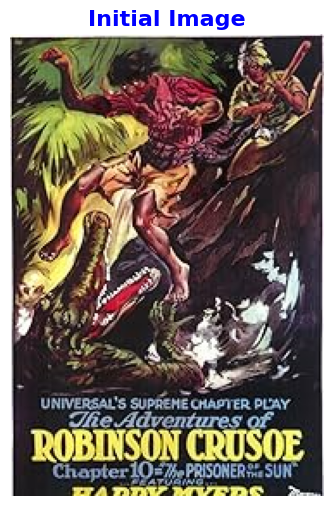

In [12]:
# Combine similarity scores with their corresponding poster IDs
unsorted_results = list(zip(similarity_scores, poster_ids))

# Sort the results in descending order based on similarity scores
sorted_results = sorted(unsorted_results, reverse=False)

# Display the query image (initial image)
plt.figure(figsize=(6, 6))
plt.imshow(Image.open(f"Posters/{poster_id_to_compare}.jpg"))  # Show the query image
plt.title("Initial Image", fontsize=16, fontweight='bold', color='blue')
plt.axis("off")
plt.show()  # Display the plot

Top 5 Similar Posters:
Rank 1: Poster ID = 4326444, Similarity Score = 65.99
Rank 2: Poster ID = 4163224, Similarity Score = 74.50
Rank 3: Poster ID = 5568330, Similarity Score = 81.95
Rank 4: Poster ID = 42283, Similarity Score = 82.40
Rank 5: Poster ID = 995868, Similarity Score = 100.75


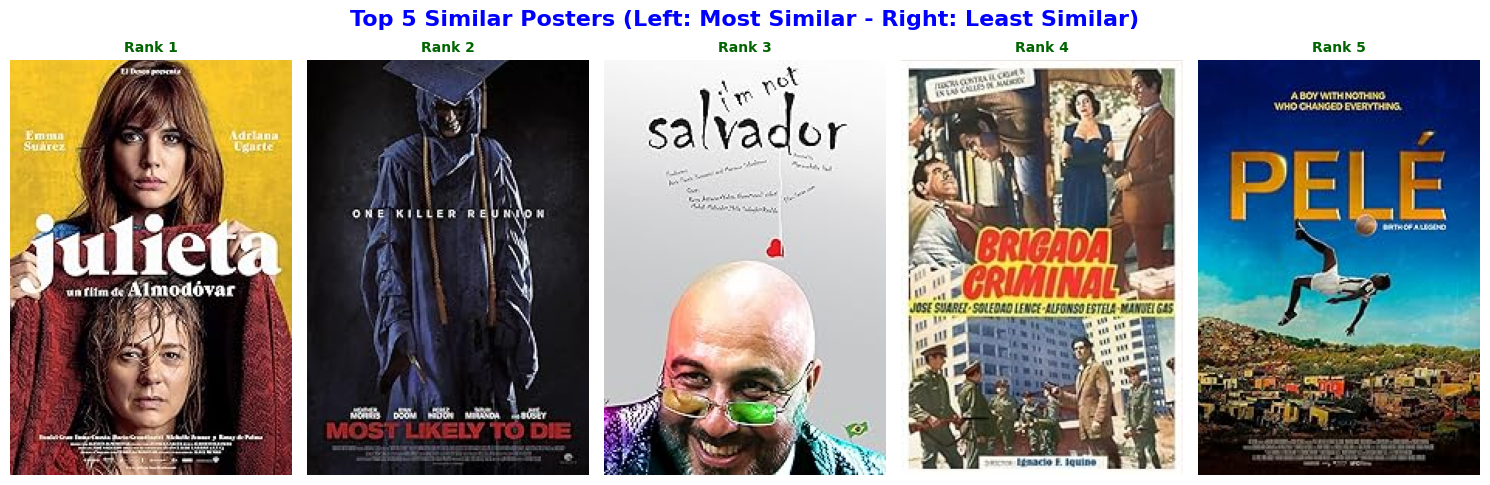

In [13]:
# Print the top 5 similarity scores and their corresponding poster IDs
print("Top 5 Similar Posters:")
for position in range(5):
    similarity_score = sorted_results[position][0][0]  # Extract the numeric similarity score
    poster_id = sorted_results[position][1]  # Extract the poster ID
    print(f"Rank {position + 1}: Poster ID = {poster_id}, Similarity Score = {similarity_score:.2f}")

# Plot the top 5 most similar images side by side with enhanced design
plt.figure(figsize=(15, 5))

# Create subplots for each of the top 5 images
for idx in range(5):
    plt.subplot(1, 5, idx + 1)
    plt.axis("off")
    
    # Load and display the current image
    image_to_plot = Image.open(f"Posters/{sorted_results[idx][1]}.jpg")
    plt.imshow(image_to_plot)
    
    # Add a title to each subplot indicating its rank
    plt.title(f"Rank {idx + 1}", fontsize=10, fontweight='bold', color='darkgreen')

# Add a main title to indicate similarity ranking
plt.suptitle("Top 5 Similar Posters (Left: Most Similar - Right: Least Similar)", 
             fontsize=16, fontweight='bold', color='blue')
plt.tight_layout()
plt.show()